<a id='top'></a>

# CSCI3022 F21
# Homework 1: Measures of Centrality and Dispersion
***

**Name**:Caleb Starkey

***

This assignment is due on Canvas by **MIDNIGHT on Tuesday, September 7**. (NB: most HW will be due on Mondays, but due to Labor Day this is one day later).  Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

[Back to top](#top)
<a/ id='p1'></a>

## (10 pts) Problem 1:Theory (The Minimal Median)
***

One way we conceptualize many data science questions is asking for the "best choice" of some parameter on data set.  We should be able to justify that our measures of centrality should in some way be the "best" ways to represent the data.


In lecture, we may have discussed the following important property of the mean:


The *sample mean* of data $X_1, X_2, \dots X_n$ is the unique minimizer $c$ of the function $$f(c)=\sum_{i=1}^n \left(X_i-c \right)^2. $$

The proof of that claim is as follows:

**Proof:**

Differentiating yields
$$f'(c)=\frac{df}{dc}\sum_{i=1}^n \left(X_i-c \right)^2 =\sum_{i=1}^n-2(X_i-c).$$ 

Setting $f'(c)=0$ gives

$$0=\sum_{i=1}^n-2(X_i-c)$$
$$=2nc-2\sum_{i=1}^n X_i$$
$$\implies\qquad  c=\frac{\sum_{i=1}^n X_i}{n}=\bar{X}$$

***

### Your exercise:

You are tasked with recreating a *similar* proof.  Prove the following:

The *median* of data $X_1, X_2, \dots X_n$ is the possibly non-unique minimizer $c$ of the function $$f(c)=\sum_{i=1}^n |X_i-c| $$

A few things to think about and **include in your solution**:

 - how do we differentiate the absolute value function?
 - what conditions might make the median non-unique in this case?  If it's nonunique, what possible values of $c$ still minimize the function $f$?  This about both how this process looks with different numbers of total points $n$ and if data values are possible identical/repeated.

**Typeset your response here**

**Proof**
$$ f(c) = \sum_{i=1}^{n} |X_i - c| $$

Differentiating yields
$$ f'(c) = \frac{df}{dc}\sum_{i=1}^{n} |X_i - c| = \sum_{i=1}^{n} -\frac{X_i-c}{|X_i-c|} $$

Setting $f'(c)=0$ gives
$$\sum_{i=1}^{n} -\frac{X_i-c}{|X_i-c|} = 0$$
$$-\sum_{i=1}^{n}\frac{X_i-c}{|X_i-c|}$$

[Back to top](#top)
<a/ id='p2'></a>

## (15 pts) Problem 2: Theory and Computation (Scaling)
***
Consider the following 3 data sets:

`A=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]`

`B=[112,0,0,12,7,18,0,25,0,13,0,35]`

`C` is the random data set generated by using `np.random.gamma(5,1.5,size=37)`

For each data set, perform the following operations:

**Part A:** Compute and print the mean and standard deviation of the data set.

In [11]:
A=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
aMean = np.mean(A)
temp = 0
for x in A:
    temp += (x-aMean)**2
aVariance = temp/len(A)
aStd = aVariance**(1/2)
print("Data set A mean: " + str(aMean))
print("Data set A standard devition: " + str(round(aStd,2)))

B=[112,0,0,12,7,18,0,25,0,13,0,35]
bMean = np.mean(B)
temp = 0
for x in B:
    temp += (x-bMean)**2
bVariance = temp/len(B)
bStd = bVariance**(1/2)
print("Data set B mean: " + str(bMean))
print("Data set B standard devition: " + str(round(bStd,2)))

C = np.random.gamma(5,1.5,size=37)
cMean = np.mean(C)
temp = 0
for x in C:
    temp += (x-cMean)**2
cVariance = temp/len(C)
cStd = cVariance**(1/2)
print("Data set C mean: " + str(round((cMean),2)))
print("Data set C standard devition: " + str(round(cStd,2)))

Data set A mean: 7.5
Data set A standard devition: 4.61
Data set B mean: 18.5
Data set B standard devition: 30.24
Data set C mean: 8.98
Data set C standard devition: 4.91


**Part B:** Plot frequency histograms of each data set, with the 3 plots stacked vertically (one on top of the other).

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

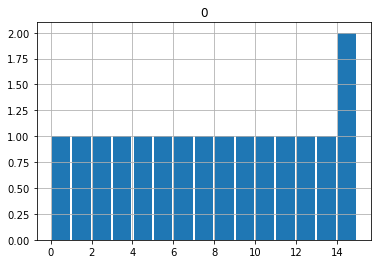

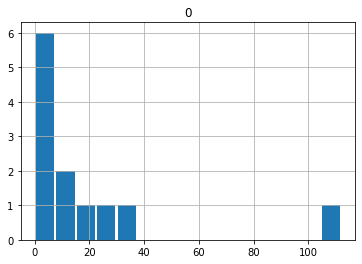

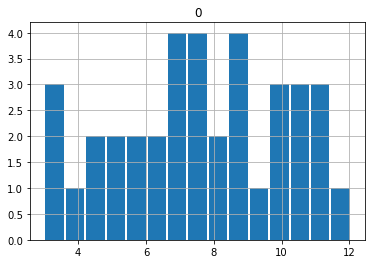

In [9]:
dfA = pd.DataFrame(A)
dfA.hist(bins = 15, rwidth = .9)
dfB = pd.DataFrame(B)
dfB.hist(bins = 15, rwidth = .9)
dfC = pd.DataFrame(C)
dfC.hist(bins = 15, rwidth = .9)

**Part C:** Form 3 new data sets, $A^*$, $B^*$, and $C^*$.  Create each by subtracting the original means of A, B, and C from each observation in that data set. Compute and print the means and standard deviations of the new data sets.

In [12]:
Astar = [x - aMean for x in A]
Bstar = [x - bMean for x in B]
Cstar = [x - cMean for x in C]
aSMean = np.mean(Astar)
temp = 0
for x in Astar:
    temp += (x-aSMean)**2
aSVariance = temp/len(Astar)
print("Data set A* mean: " + str(aSMean))
print("Data set A* standard devition: " + str(round(aSVariance**(1/2),2)))

bSMean = np.mean(Bstar)
temp = 0
for x in Bstar:
    temp += (x-bSMean)**2
bSVariance = temp/len(Bstar)
print("Data set B* mean: " + str(bSMean))
print("Data set B* standard devition: " + str(round(bSVariance**(1/2),2)))

cSMean = np.mean(Cstar)
temp = 0
for x in Cstar:
    temp += (x-cSMean)**2
cSVariance = temp/len(Cstar)
print("Data set C* mean: " + str(round((cSMean),2)))
print("Data set C* standard devition: " + str(round(cSVariance**(1/2),2)))

Data set A* mean: 0.0
Data set A* standard devition: 4.61
Data set B mean: 0.0
Data set B standard devition: 30.24
Data set C mean: 0.0
Data set C standard devition: 4.91


**Part D:** Form 3 new data sets, $\tilde{A}$, $\tilde{B}$, and $\tilde{C}$.  Create each by subtracting the original means of A, B, and C from each observation in that data set and then dividing by the original standard deviation.  Compute and print the means and standard deviations of the new data sets.

In [15]:
Atild = [(x - aMean)/aStd for x in A]
Btild = [(x - bMean)/bStd for x in B]
Ctild = [(x - cMean)/cStd for x in C]
aTMean = np.mean(Atild)
temp = 0
for x in Atild:
    temp += (x-aTMean)**2
aTVariance = temp/len(Atild)
print("Data set A~ mean: " + str(aTMean))
print("Data set A~ standard devition: " + str(round(aTVariance**(1/2),2)))

bTMean = np.mean(Btild)
temp = 0
for x in Btild:
    temp += (x-bTMean)**2
bTVariance = temp/len(Btild)
print("Data set B~ mean: " + str(round(bTMean,2)))
print("Data set B~ standard devition: " + str(round(bTVariance**(1/2),2)))

cTMean = np.mean(Ctild)
temp = 0
for x in Ctild:
    temp += (x-cTMean)**2
cTVariance = temp/len(Ctild)
print("Data set C~ mean: " + str(round((cTMean),2)))
print("Data set C~ standard devition: " + str(round(cTVariance**(1/2),2)))

Data set A~ mean: 0.0
Data set A~ standard devition: 1.0
Data set B~ mean: -0.0
Data set B~ standard devition: 1.0
Data set C~ mean: 0.0
Data set C~ standard devition: 1.0


**Part E:** Plot density histograms of each $\tilde{A}$, $\tilde{B}$, and $\tilde{C}$, with the 3 plots stacked vertically (one on top of the other).  Ensure that each plot has the same horizontal axis.  

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

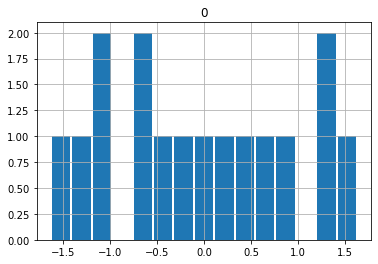

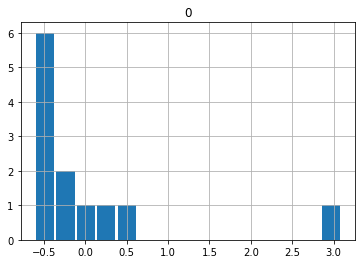

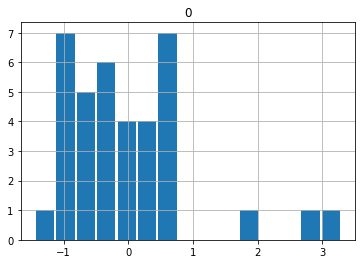

In [16]:
dfA = pd.DataFrame(Atild)
dfA.hist(bins = 15, rwidth = .9)
dfB = pd.DataFrame(Btild)
dfB.hist(bins = 15, rwidth = .9)
dfC = pd.DataFrame(Ctild)
dfC.hist(bins = 15, rwidth = .9)

**Part F:** Why might the result in part D matter?

**Typeset your response here**


**Part G:** Looking at each of the 3 original data sets, come up with a real-world context where those numbers might make for reasonable observations.

**Typeset your response here**


[Back to top](#top)
<a/ id='p3'></a>

## (20 pts) Problem 3: Practice (Titanic)
*** 
The sinking of the RMS Titanic was a terrible tragedy that saw the loss of many lives. Even within this tragedy, thanks to the combinations of the records of the White Star Line and the thorough nature of follow-up research after the accident we have some records that can help us try to piece together the course of events on board the ship. Many of the historians and other researchers who have investigated this event have speculated as to what exactly happened.

We have the data on survival rates by class, gender, and age, so let's figure out whether there is evidence for some of these scenarios. Access the Titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival (**Survived**), and gender (**Sex**) of passengers, among other things. Be sure to use the `titanic_data.csv` data set, *not* the `clean_titanic_data` file or `dirty_titanic_data` file from the in-class notebook exercises.

In [5]:
filepath = '../Data/titanic_data.csv'
df = pd.read_csv(filepath)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../Data/titanic_data.csv'

**Part A**:
Based on the overall population of passengers, report the proportion that survived.

$$P(Survived=1)$$

**Part B**: 
Some claim that the final hours aboard the RMS Titanic were marked by "class warfare" in which the people with first-class tickets took all the good spots on the lifeboats; others claim that the final hours were characterized by male chivalry, in which the men valiantly gave up their positions in the boats and succumbed bravely to the depths of the Atlantic. 

Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours instead. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

**Typeset your response here**


**Part C**: Use Pandas methods to create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. Be sure to show any exploratory work determining if/where there are rows with missing values. _HINT: There should be 714 rows in your cleaned data set._

**Part D**: Compute the probability of survival of both men and women.  Then, compute the probability of survival of passengers in each of the 3 passenger classes.  Finally, compute the probabilities of survival and men and women *within* each passenger class (all 6 subsets).  Then, answer the following questions:
* **(i)** When reviewing class survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(ii)** When reviewing gender survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(iii)** Within each passenger class, were men or women more/less/equally likely to survive?
* **(iv)**  Did men in first class or women in third class have a higher survival probability?


**Typeset your responses here**

**Part E**: One might wonder how a passenger's age is related to the likelihood that they would survive the Titanic disaster. In addition to the "male chivalry" argument outlined above, you can perhaps imagine an addendum - "women and children first!" - as the cry to ring out across the decks. Or you might imagine the opposite - rather than "class warfare", it is simply healthy adults fighting to take lifeboat spots for themselves.

To answer this question graphically, plot two density histograms on the *same set* of axes, showing the distribution of the ages of passengers who survived, and the distribution of the ages of passengers who did not.  This means that the two axes should overlap. 
* Use the bin edges $[0,4,8,\ldots,72,76,80]$ for both histograms.
* To better distinguish between our populations, we will represent survivors with `darkgreen` and the passed with `red`.
* As you plot both histograms on a single set of axes you should use Matplotlib/Pandas plotting functionality to make the faces of the histogram boxes somewhat transparent, so both histograms are visible and their overlap becomes a blend of the two colors.
* Include a legend and label your axes.
* Comment on the results. Does your figure suggest that some age ranges are more or less likely to have survived the disaster than other ages? Fully explain your reasoning and use your figure to justify your conclusions.
* If you noticed some relationship between age and likelihood of survival, what is one possible explanation?

**Part F:** In Part E, we plotted two *density* histograms, showing the distributions of ages of passengers that survived or did not survive the Titanic disaster. Why would it be misleading for us to have plotted these as *frequency* histograms instead?

**Typeset your response here**


**Part G**: Do the data suggest class warfare, male chivalry, age bias, or some combination of these characteristics in the final hours aboard the Titanic?  Justify your conclusions based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusions.

**Typeset your response here**


**Part H**: In lecture we described some types of sampling from a *sample frame*.  Perform the following operations:

1) Since the overall ship had around 65% men, create a *sample* of distinct passengers from the overall ship that consists of exactly 13 randomly chosen men and 7 randomly chosen women.  Report the proportion of those passengers that survived.

2) Repeat the sampling process from part 1) 1000 times.  Report the **mean** survival proportion of those 1000 samples.  Is this close to the survival rate in part A?  Why or why not?

3) Make a histogram of the 1000 sample means from parth H2.  Include an indicator of the mean your computed in H2 on the histogram.

4) What is the name for this sort of sample?


**Typeset your response here**
